# Assignment 1 - Game of Thrones

In [2]:
#from __future__ import division
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import warnings
from collections import Counter
import sys
import os
plt.rcParams["figure.figsize"] = (20,10)
import tqdm as tqdm

warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### Game of thrones network

![](images/got.png)

Andrew J. Beveridge, an associate professor of mathematics at Macalester College, and Jie Shan, an undergraduate created a network from the book A Storm of Swords by extracting relationships between characters to find out the most important characters in the book(or GoT).

The dataset is publicly avaiable for the 5 books at https://github.com/mathbeveridge/asoiaf. This is an interaction network and were created by connecting two characters whenever their names (or nicknames) appeared within 15 words of one another in one of the books. The edge weight corresponds to the number of interactions.

In [3]:
books = []
for i in range(5):
    books.append(pd.read_csv('../data/homework2_assignment1/asoiaf-book{}-edges.csv'.format(i+1)))

In [4]:
all_books = pd.concat(books)

In [5]:
all_books.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1.0
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1.0
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1.0
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1.0
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1.0


### we will sum all the books into a single edge between characters

In [6]:
edges = all_books.groupby(['Source','Target']).agg({'weight':'sum'}).reset_index()

In [7]:
edges.sort_values('weight',ascending=False).head()

,Source,Target,weight
1334,Eddard-Stark,Robert-Baratheon,334
2031,Jon-Snow,Samwell-Tarly,228
1965,Joffrey-Baratheon,Sansa-Stark,222
1972,Joffrey-Baratheon,Tyrion-Lannister,219
640,Bran-Stark,Hodor,209


In [9]:
GOT = nx.from_pandas_edgelist(edges, 
                            source='Source',
                            target='Target',
                            edge_attr='weight' )

In [10]:
print(nx.info(GOT))

Graph with 796 nodes and 2823 edges


In [11]:
weighted_degrees = dict(nx.degree(GOT,weight='weight'))
max_degree = max(weighted_degrees.values())

In [13]:
import seaborn as sns

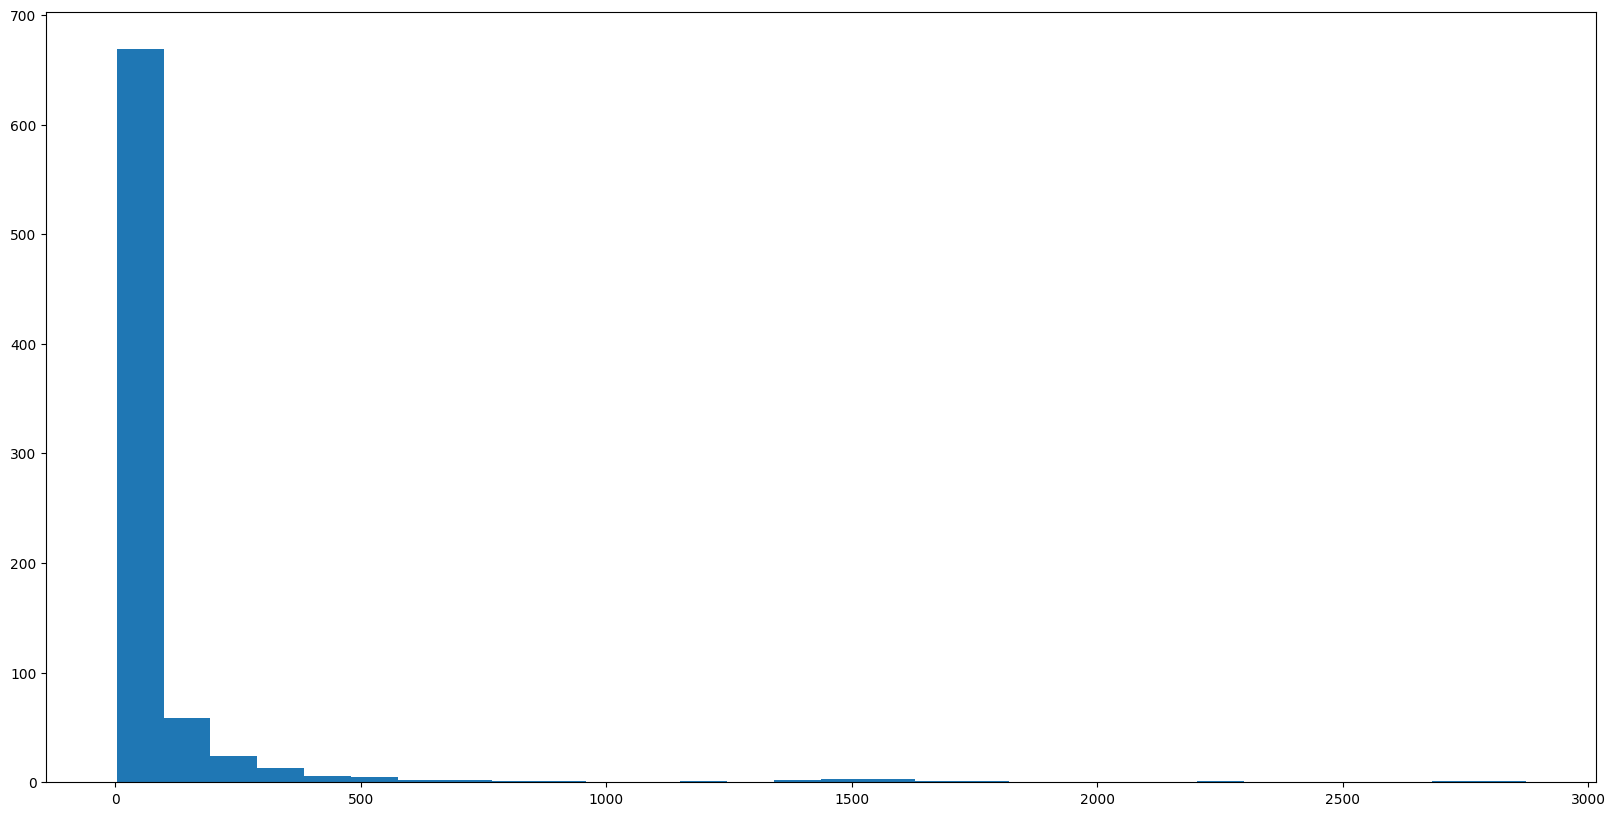

In [14]:
h = plt.hist(weighted_degrees.values(), bins = 30)

### Let's focus on the subnetwork of the key characters:

In [15]:
subG = GOT.subgraph([n for n in weighted_degrees if weighted_degrees[n]>200])

In [16]:
print(nx.info(subG))

Graph with 63 nodes and 496 edges


In [17]:
pos = nx.spring_layout(subG,weight='weight',iterations=20, k = 4)

Plot the network:

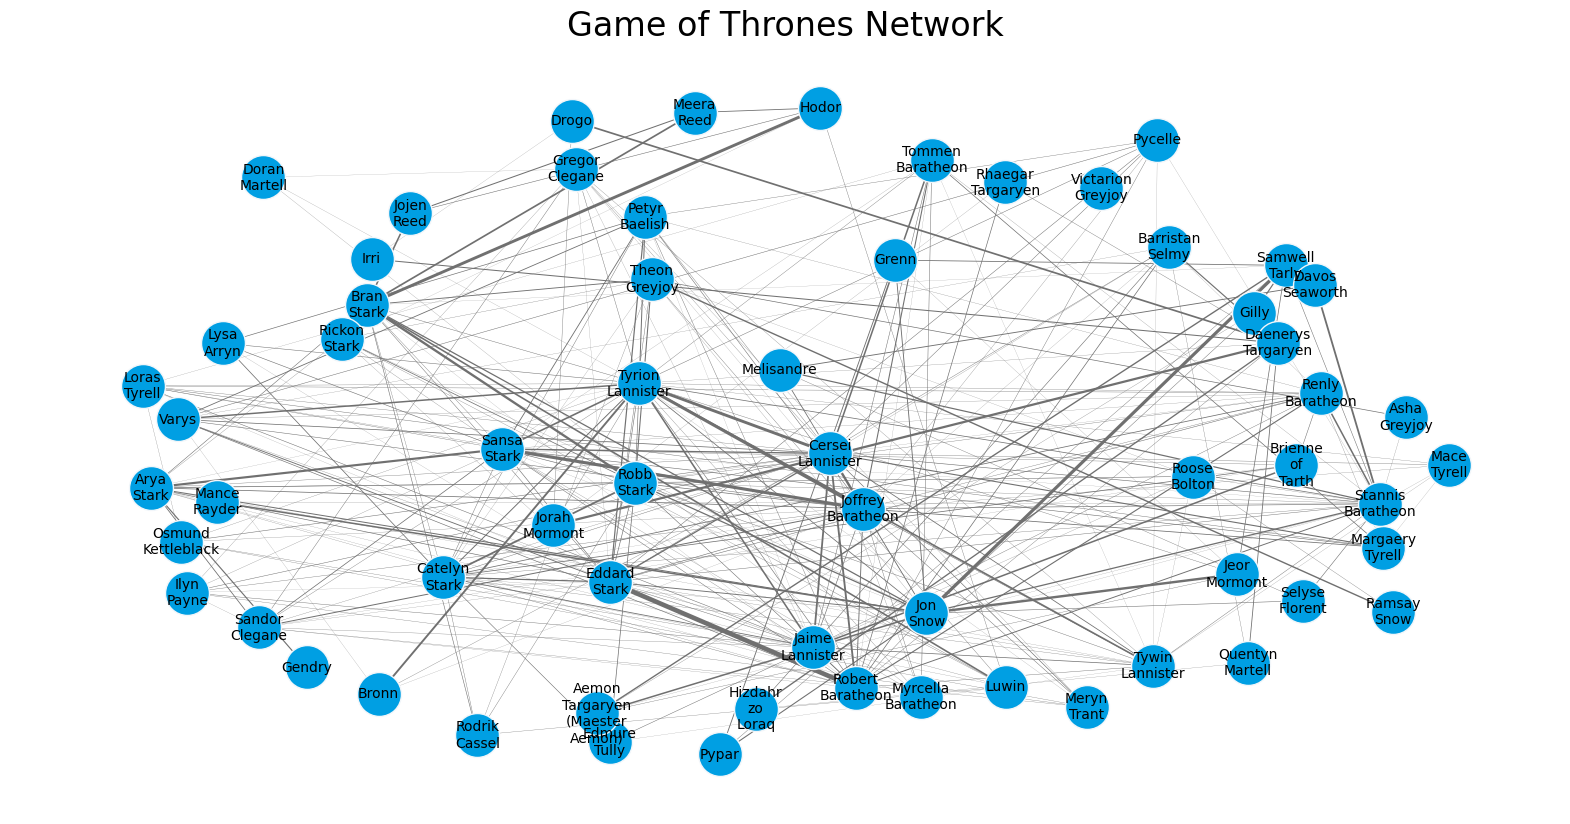

In [18]:
#%matplotlib inline
plt.axis('off')
plt.title('Game of Thrones Network',fontsize = 24)


for node in subG.nodes():
    #size = 100*weighted_degrees[node]**0.5
    ns = nx.draw_networkx_nodes(subG,pos,nodelist=[node], node_size=1000, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')

nx.draw_networkx_labels(subG,pos,{n:n.replace('-','\n') for n in subG.nodes() if weighted_degrees[n]>100},font_size=10);

for e in subG.edges(data=True):
    if e[2]['weight']>10:
        nx.draw_networkx_edges(subG,pos,[e],width=e[2]['weight']/100,edge_color='#707070')

## Task 1 (1,5 pkt)
Find the diameter of the graph and find all pairs of vertices that are connected by the shortest path with the length of the graph diameter.

In [ ]:
#your answer here

## Task 2 (0,5 pkt)
Are there any clicks in the graph? If so, how many are there? 

In [ ]:
#your answer here